# Data Scraping

# Data Scraping
### By: Adam Aharony, adam.aharony@gmail.com, 214435448.

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from time import sleep
import pandas as pd
import random


def wait():
    r = random.uniform(3, 10)
    sleep(r)

In [2]:
option = webdriver.ChromeOptions()

option.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36")
# option.add_argument("--profile-directory=Default")
# option.add_argument("--user-data-dir=C:/Users/adama/AppData/Local/Google/Chrome/User Data")
option.add_argument('--disable-blink-features=AutomationControlled')
option.add_experimental_option("useAutomationExtension", False)
option.add_experimental_option("excludeSwitches",["enable-automation"])

#Open Browser
driver = webdriver.Chrome(executable_path='chromedriver.exe',options=option)
driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")

site = "https://www.techpowerup.com/gpu-specs/?mfgr={manufacturer}"
manufacturers = ("3dfx", "AMD", "ATI", "Intel", "Matrox", "NVIDIA", "Sony", "XGI")

<ipython-input-2-3cd401e27fc0>:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='chromedriver.exe',options=option)


In [ ]:
ROWS = []

In [ ]:
# for manufacturer in manufacturers:
manufacturer = manufacturers[7]
driver.get(site.format(manufacturer=manufacturer))
# Getting released years
years_select = Select(driver.find_element(By.ID, "released"))
years = [year.text for year in years_select.options][1:]
years = [y[:y.index(" ")] for y in years]
wait()
for year in years:
    driver.get(site.format(manufacturer=manufacturer) + f"&released={year}")
    elems = driver.find_elements(By.CLASS_NAME, f"vendor-{manufacturer}")
    names = [e.find_element(By.TAG_NAME, "a").text for e in elems]
    links = [e.find_element(By.TAG_NAME, "a") for e in elems]
    addresses = [link.get_attribute("href") for link in links]
    for name, address in zip(names, addresses):
        row = {"Name": name, "Link": address, "Year": year}
        ROWS.append(row)
        
    wait()

In [ ]:
df = pd.DataFrame(ROWS)
df

,Name,Link,Year
0,Volari 8300,https://www.techpowerup.com/gpu-specs/volari-8...,2005
1,Volari 8600 XT,https://www.techpowerup.com/gpu-specs/volari-8...,2005
2,Volari Duo V5 Ultra,https://www.techpowerup.com/gpu-specs/volari-d...,2003
3,Volari Duo V5 Ultra,https://www.techpowerup.com/gpu-specs/volari-d...,2003
4,Volari Duo V8 Ultra,https://www.techpowerup.com/gpu-specs/volari-d...,2003
5,Volari Duo V8 Ultra,https://www.techpowerup.com/gpu-specs/volari-d...,2003
6,Volari V3,https://www.techpowerup.com/gpu-specs/volari-v...,2003
7,Volari V3 XT,https://www.techpowerup.com/gpu-specs/volari-v...,2003
8,Volari V5,https://www.techpowerup.com/gpu-specs/volari-v...,2003
9,Volari V5,https://www.techpowerup.com/gpu-specs/volari-v...,2003


In [ ]:
df.to_csv(f"{manufacturer}.csv")

In [3]:
manufacturer = manufacturers[7]

In [4]:
ROWS = []

In [5]:
df = pd.read_csv(f"manufacturers/{manufacturer}.csv")
# df = df.drop(columns=["Unnamed: 0"])
for i, row in df.iterrows():
    ROWS.append(dict(row))
ROWS

[{'Name': 'Volari 8300',
  'Link': 'https://www.techpowerup.com/gpu-specs/volari-8300.c3379',
  'Year': 2005},
 {'Name': 'Volari 8600 XT',
  'Link': 'https://www.techpowerup.com/gpu-specs/volari-8600-xt.c3380',
  'Year': 2005},
 {'Name': 'Volari Duo V5 Ultra',
  'Link': 'https://www.techpowerup.com/gpu-specs/volari-duo-v5-ultra.c89',
  'Year': 2003},
 {'Name': 'Volari Duo V5 Ultra',
  'Link': 'https://www.techpowerup.com/gpu-specs/volari-duo-v5-ultra.c90',
  'Year': 2003},
 {'Name': 'Volari Duo V8 Ultra',
  'Link': 'https://www.techpowerup.com/gpu-specs/volari-duo-v8-ultra.c91',
  'Year': 2003},
 {'Name': 'Volari Duo V8 Ultra',
  'Link': 'https://www.techpowerup.com/gpu-specs/volari-duo-v8-ultra.c92',
  'Year': 2003},
 {'Name': 'Volari V3',
  'Link': 'https://www.techpowerup.com/gpu-specs/volari-v3.c1198',
  'Year': 2003},
 {'Name': 'Volari V3 XT',
  'Link': 'https://www.techpowerup.com/gpu-specs/volari-v3-xt.c1197',
  'Year': 2003},
 {'Name': 'Volari V5',
  'Link': 'https://www.techpo

In [7]:
for i, row in enumerate(ROWS):
    if list(row.keys()) == ["Name", "Link", "Year"]:
        driver.get(row["Link"])
        wait()
        celems = driver.find_elements(By.CLASS_NAME, "gpudb-specs-large__title")
        relems = driver.find_elements(By.CLASS_NAME, "gpudb-specs-large__value")
        ROWS[i].update({c.text:r.text for c, r in zip(celems, relems)})
        clearfix = driver.find_elements(By.CLASS_NAME, "clearfix")
        for c in clearfix:
            celems = c.find_elements(By.TAG_NAME, "dt")
            relems = c.find_elements(By.TAG_NAME, "dd")
            ROWS[i].update({c.text:r.text for c, r in zip(celems, relems)})
        wait()

In [8]:
df = pd.DataFrame(ROWS)
df

,Name,Link,Year,GRAPHICS PROCESSOR,PIXEL SHADERS,VERTEX SHADERS,TMUS,ROPS,MEMORY SIZE,MEMORY TYPE,...,DirectX,OpenGL,OpenCL,Vulkan,Shader Model,Pixel Shader,Vertex Shader,GPU Variant,Power Connectors,Board Number
0,Volari 8300,https://www.techpowerup.com/gpu-specs/volari-8...,2005,XG47,4,2,8,4,128 MB,DDR,...,9.0c,2.1,N/A,N/A,3.0,NaN,NaN,NaN,NaN,NaN
1,Volari 8600 XT,https://www.techpowerup.com/gpu-specs/volari-8...,2005,XG45,8,2,8,4,256 MB,GDDR3,...,9.0c,2.1,N/A,N/A,3.0,NaN,NaN,NaN,NaN,NaN
2,Volari Duo V5 Ultra,https://www.techpowerup.com/gpu-specs/volari-d...,2003,XG41 x2,2 x2,2 x2,4 x2,2 x2,256 MB x2,DDR,...,9.0,1.4,N/A,N/A,NaN,2.0,2.0,NaN,NaN,NaN
3,Volari Duo V5 Ultra,https://www.techpowerup.com/gpu-specs/volari-d...,2003,XG41 x2,2 x2,2 x2,4 x2,2 x2,256 MB x2,DDR2,...,9.0,1.4,N/A,N/A,NaN,2.0,2.0,NaN,NaN,NaN
4,Volari Duo V8 Ultra,https://www.techpowerup.com/gpu-specs/volari-d...,2003,XG40 x2,4 x2,2 x2,8 x2,4 x2,256 MB x2,DDR,...,9.0,1.5,N/A,N/A,NaN,2.0,2.0,Volari V8 Ultra,2x Molex,NaN
5,Volari Duo V8 Ultra,https://www.techpowerup.com/gpu-specs/volari-d...,2003,XG40 x2,4 x2,2 x2,8 x2,4 x2,128 MB x2,DDR2,...,9.0,1.5,N/A,N/A,NaN,2.0,2.0,Volari V8 Ultra,2x Molex,NaN
6,Volari V3,https://www.techpowerup.com/gpu-specs/volari-v...,2003,XG42,2,1,4,2,128 MB,DDR,...,8.1,1.3,N/A,N/A,NaN,1.3,1.1,NaN,NaN,NaN
7,Volari V3 XT,https://www.techpowerup.com/gpu-specs/volari-v...,2003,XG42,2,1,4,2,128 MB,DDR,...,8.1,1.3,N/A,N/A,NaN,1.3,1.1,XG42 V3XT,NaN,D134
8,Volari V5,https://www.techpowerup.com/gpu-specs/volari-v...,2003,XG41,2,2,4,2,256 MB,DDR,...,9.0,1.4,N/A,N/A,NaN,2.0,2.0,NaN,NaN,NaN
9,Volari V5,https://www.techpowerup.com/gpu-specs/volari-v...,2003,XG41,2,2,4,2,256 MB,DDR2,...,9.0,1.4,N/A,N/A,NaN,2.0,2.0,NaN,NaN,NaN


In [ ]:
ROWS[-1]

{'Name': 'Playstation GPU 600nm',
 'Link': 'https://www.techpowerup.com/gpu-specs/playstation-gpu-600nm.c3707',
 'Year': 1994,
 'GRAPHICS PROCESSOR': 'GTE',
 'PIXEL SHADERS': '2',
 'VERTEX SHADERS': '1',
 'TMUS': '3',
 'ROPS': '1',
 'MEMORY SIZE': '1 MB',
 'MEMORY TYPE': 'VRAM',
 'BUS WIDTH': '32 bit',
 'GPU Name': 'GTE',
 'GPU Variant': 'CXD8514Q',
 'Foundry': 'Sony',
 'Process Size': '600 nm',
 'Transistors': '1 million',
 'Die Size': '128 mm²',
 'Release Date': 'Dec 3rd, 1994',
 'Generation': 'Console GPU\n(Sony)',
 'Production': 'End-of-life',
 'Launch Price': '299 USD',
 'GPU Clock': '53 MHz',
 'Memory Clock': '33 MHz',
 'Memory Size': '1 MB',
 'Memory Type': 'VRAM',
 'Memory Bus': '32 bit',
 'Bandwidth': '132.0 MB/s',
 'Pixel Shaders': '2',
 'Vertex Shaders': '1',
 'TMUs': '3',
 'ROPs': '1',
 'Pixel Rate': '53.00 MPixel/s',
 'Vertex Rate': '13.25 MVertices/s',
 'Texture Rate': '159.0 MTexel/s',
 'Length': '270 mm\n10.6 inches',
 'Width': '60 mm\n2.4 inches',
 'Height': '188 mm\n7

In [ ]:
# save list:
import pickle
with open("ROWS.pickle", "wb") as f:
    pickle.dump(ROWS, f)

In [ ]:
# read list:
import pickle
with open("ROWS.pickle", "rb") as f:
    ROWS = pickle.load(f)

In [9]:
df.to_csv(f"manufacturers/{manufacturer}.csv", index=False)

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)

KeyError: KeyError: "['Unnamed: 0'] not found in axis"

# Data Processing

# Data Processing
### By: Adam Aharony, adam.aharony@gmail.com, 214435448.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

Merging all manufacturers to one DataFrame

In [2]:
folder = "manufacturers"
manufacturers = ("3dfx", "AMD", "ATI", "Intel", "Matrox", "NVIDIA", "Sony", "XGI")

ROWS = []

for manufacturer in manufacturers:
    df = pd.read_csv(f"{folder}/{manufacturer}.csv")

    for _, row in df.iterrows():
        row = dict(row)
        row.update({"Manufacturer": manufacturer})
        ROWS.append(row)


df = pd.DataFrame(ROWS)

Dropping duplicate columns

In [3]:
df.columns

Index(['Name', 'Link', 'Year', 'GRAPHICS PROCESSOR', 'PIXEL SHADERS',
       'VERTEX SHADERS', 'TMUS', 'ROPS', 'MEMORY SIZE', 'MEMORY TYPE',
       'BUS WIDTH', 'GPU Name', 'Architecture', 'Foundry', 'Process Size',
       'Transistors', 'Die Size', 'Release Date', 'Generation', 'Predecessor',
       'Production', 'Launch Price', 'Bus Interface', 'GPU Clock',
       'Memory Clock', 'Memory Size', 'Memory Type', 'Memory Bus', 'Bandwidth',
       'Pixel Shaders', 'Vertex Shaders', 'TMUs', 'ROPs', 'Pixel Rate',
       'Texture Rate', 'Slot Width', 'TDP', 'Suggested PSU', 'Outputs',
       'Power Connectors', 'Board Number', 'DirectX', 'OpenGL', 'OpenCL',
       'Vulkan', 'Pixel Shader', 'Vertex Shader', 'Vertex Rate', 'Successor',
       'GPU Variant', 'Manufacturer', 'CORES', 'Shading Units',
       'Compute Units', 'FP32 (float) performance', 'Length', 'Width',
       'Height', 'Weight', 'Shader Model', 'Reviews', 'L1 Cache', 'L2 Cache',
       'FP64 (double) performance', 'Base Clock',

In [4]:
cols = ['GRAPHICS PROCESSOR', 'PIXEL SHADERS', 'VERTEX SHADERS', 
        'TMUS', 'ROPS', 'MEMORY SIZE', 'MEMORY TYPE', 'BUS WIDTH', 'Current Price']
df.drop(columns=cols, inplace=True)

In [5]:
df.to_csv("raw_data.csv", index=False)

In [6]:
df = pd.read_csv("raw_data.csv")

### Data Exploration:

In [7]:
df.columns, df.columns.shape

(Index(['Name', 'Link', 'Year', 'GPU Name', 'Architecture', 'Foundry',
        'Process Size', 'Transistors', 'Die Size', 'Release Date', 'Generation',
        'Predecessor', 'Production', 'Launch Price', 'Bus Interface',
        'GPU Clock', 'Memory Clock', 'Memory Size', 'Memory Type', 'Memory Bus',
        'Bandwidth', 'Pixel Shaders', 'Vertex Shaders', 'TMUs', 'ROPs',
        'Pixel Rate', 'Texture Rate', 'Slot Width', 'TDP', 'Suggested PSU',
        'Outputs', 'Power Connectors', 'Board Number', 'DirectX', 'OpenGL',
        'OpenCL', 'Vulkan', 'Pixel Shader', 'Vertex Shader', 'Vertex Rate',
        'Successor', 'GPU Variant', 'Manufacturer', 'CORES', 'Shading Units',
        'Compute Units', 'FP32 (float) performance', 'Length', 'Width',
        'Height', 'Weight', 'Shader Model', 'Reviews', 'L1 Cache', 'L2 Cache',
        'FP64 (double) performance', 'Base Clock', 'Boost Clock', 'Part Number',
        'Execution Units', 'RT Cores', 'FP16 (half) performance', 'L3 Cache',
        '

In [8]:
df.describe()

,Year,Pixel Shaders,Vertex Shaders,TMUs,ROPs,Vulkan,Shading Units,Compute Units,Shader Model,Execution Units,RT Cores,SM Count,Tensor Cores,CUDA,SMM Count,SMX Count
count,2164.000000,850.000000,850.000000,2158.000000,2158.000000,625.000000,1308.000000,219.000000,1561.000000,139.000000,118.000000,688.000000,139.000000,921.000000,97.000000,165.000000
mean,2009.002311,6.530588,2.531765,40.096849,17.427711,1.230080,1005.058104,4.899543,4.775080,56.906475,44.322034,17.565407,311.136691,3.858089,7.546392,5.224242
std,6.386206,7.889677,2.574598,67.037686,25.317220,0.102019,1822.171544,4.329221,1.207116,101.559285,22.372099,23.109166,180.484862,2.521814,5.933697,4.334141
min,1986.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,1.000000,2.000000,2.000000,6.000000,1.000000,40.000000,1.000000,1.000000,1.000000
25%,2004.000000,2.000000,0.000000,4.000000,4.000000,1.100000,96.000000,2.000000,4.000000,16.000000,30.000000,2.000000,184.000000,2.000000,3.000000,2.000000
50%,2008.000000,4.000000,2.000000,16.000000,8.000000,1.300000,320.000000,4.000000,5.100000,24.000000,40.000000,8.000000,288.000000,3.000000,5.000000,4.000000
75%,2013.000000,8.000000,4.000000,40.000000,16.000000,1.300000,1024.000000,5.000000,5.100000,48.000000,57.500000,20.000000,432.000000,6.100000,10.000000,8.000000
max,2023.000000,48.000000,24.000000,544.000000,192.000000,1.300000,17408.000000,20.000000,6.600000,512.000000,136.000000,136.000000,640.000000,9.000000,24.000000,15.000000


In [9]:
df

,Name,Link,Year,GPU Name,Architecture,Foundry,Process Size,Transistors,Die Size,Release Date,...,RT Cores,FP16 (half) performance,L3 Cache,Availability,SM Count,Tensor Cores,CUDA,SMM Count,SMX Count,Shader Clock
0,Spectre 1000,https://www.techpowerup.com/gpu-specs/spectre-...,2001,Rampage,Voodoo Scalable,TSMC,180 nm,30 million,131 mm²,Never Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spectre 2000,https://www.techpowerup.com/gpu-specs/spectre-...,2001,Sage,Voodoo Scalable,TSMC,180 nm,25 million,unknown,Never Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Spectre 3000,https://www.techpowerup.com/gpu-specs/spectre-...,2001,Sage,Voodoo Scalable,TSMC,180 nm,25 million,unknown,Never Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Voodoo4 4000 AGP,https://www.techpowerup.com/gpu-specs/voodoo4-...,2000,VSA-100,Voodoo Scalable,TSMC,250 nm,14 million,112 mm²,Never Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Voodoo4 4500 AGP,https://www.techpowerup.com/gpu-specs/voodoo4-...,2000,VSA-100,Voodoo Scalable,TSMC,250 nm,14 million,112 mm²,"Oct 13th, 2000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,Volari V5 Ultra,https://www.techpowerup.com/gpu-specs/volari-v...,2003,XG41,XG4,UMC,130 nm,90 million,unknown,"Sep 15th, 2003",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2160,Volari V8,https://www.techpowerup.com/gpu-specs/volari-v...,2003,XG40,XG4,UMC,130 nm,110 million,unknown,"Sep 15th, 2003",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2161,Volari V8,https://www.techpowerup.com/gpu-specs/volari-v...,2003,XG40,XG4,UMC,130 nm,110 million,unknown,"Sep 15th, 2003",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2162,Volari V8 Ultra,https://www.techpowerup.com/gpu-specs/volari-v...,2003,XG40,XG4,UMC,130 nm,110 million,unknown,"Sep 15th, 2003",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Manipulation:

Removing columns with more than 60% null values

In [10]:
N = len(df)
notnull = df.notnull().sum()

ratio = 0.6
cols = notnull[notnull > ratio * N]
df[cols.index].to_csv("processing/clean_cols.csv", index=False)

Removing unnecessary columns for regression

In [11]:
df = pd.read_csv("processing/clean_cols.csv")

In [12]:
unnecessary = ["Name", "Link", "GPU Name", "Release Date", "Architecture",
               "Generation", "Predecessor", "Bus Interface", "GPU Variant"]
df.drop(columns=unnecessary, inplace=True)
df[df.isnull().sum(axis=1) < len(df.columns)/2]
df.to_csv("processing/clean_cols.csv", index=False)

In [13]:
df.columns

Index(['Year', 'Foundry', 'Process Size', 'Transistors', 'Die Size',
       'Production', 'GPU Clock', 'Memory Clock', 'Memory Size', 'Memory Type',
       'Memory Bus', 'Bandwidth', 'TMUs', 'ROPs', 'Pixel Rate', 'Texture Rate',
       'Slot Width', 'TDP', 'Outputs', 'Power Connectors', 'DirectX', 'OpenGL',
       'Manufacturer', 'CORES', 'Shading Units', 'FP32 (float) performance',
       'Shader Model'],
      dtype='object')

Converting data with units to simple numbers

In [14]:
cols = ("Process Size", "Transistors", "Die Size", "GPU Clock", "Memory Clock",
        "Memory Size", "Memory Bus", "Bandwidth", "Pixel Rate", "Texture Rate",
        "TDP", "FP32 (float) performance")
special_cols = ("Length", "Width", "Height", "Weight", "Reviews")

for col in cols:
    print(col, df[col].unique())
    print("\n\n")

Process Size ['180 nm' '250 nm' '350 nm' '500 nm' '45 nm' '55 nm' '40 nm' '65 nm'
 '130 nm' '110 nm' '80 nm' '90 nm' '150 nm' nan '600 nm' '700 nm' '800 nm'
 '6 nm' '10 nm' '14 nm+++' '10 nm+' '14 nm' '14 nm++' '14 nm+' '22 nm'
 '32 nm' '0 nm' '5 nm' '12 nm' '8 nm' '4 nm' '7 nm' '20 nm' '16 nm'
 '28 nm' '220 nm']



Transistors ['30 million' '25 million' '14 million' '8.2 million' '4 million'
 '1 million' '372 million' '956 million' '627 million' '292 million'
 '2,154 million' '242 million' '378 million' '514 million' '716 million'
 '1,040 million' '181 million' '826 million' '180 million' '390 million'
 '959 million' '75 million' '666 million' '120 million' '232 million'
 '8 million' '720 million' '107 million' '157 million' '384 million'
 '60 million' '330 million' '160 million' 'unknown' '36 million'
 '321 million' '76 million' '117 million' '110 million' nan '51 million'
 '5 million' '7,200 million' '21,700 million' '8,000 million'
 '1,300 million' '5,000 million' '1,200 million' '

In [64]:
df = pd.read_csv("processing/clean_cols.csv")

In [65]:
cols = ("Process Size", "Transistors", "Die Size", "GPU Clock", "TDP")
units = ("nm", "million", "mm²", "MHz", "W")
mixed_cols = ("Bandwidth", "Pixel Rate", "Texture Rate", "FP32 (float) performance",
              "Memory Size", "Memory Bus")
# Special: Memory Clock,


def memory_clock_unit_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "System Shared":
            return 0
        space = x.index(" ")
        return np.float32(x[:space])
    except Exception as e:
        print(e, x)


df["Memory Clock"] = df["Memory Clock"].map(memory_clock_unit_remap)
df.rename(columns={"Memory Clock": "Memory Clock [MHz]"}, inplace=True)


def memory_size_unit_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "System Shared":
            return 0
        space = x.index(" ")
        unit = x[space+1:]
        if unit == "MB":
            return np.float32(x[:space]) * 0.001
        elif unit == "GB":
            return np.float32(x[:space])
        elif unit == "KB":
            return np.float32(x[:space]) * 1e-6
    except Exception as e:
        print(e, x)


df["Memory Size"] = df["Memory Size"].map(memory_size_unit_remap)
df.rename(columns={"Memory Size": "Memory Size [GB]"}, inplace=True)


def bandwidth_unit_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "System Shared" or x == "System Dependent":
            return 0
        x = x.replace(",", "")
        space = x.index(" ")
        unit = x[space+1:]
        if unit == "MB/s":
            return np.float32(x[:space]) * 0.001
        elif unit == "GB/s":
            return np.float32(x[:space])
        elif unit == "KB/s":
            return np.float32(x[:space]) * 1e-6
    except Exception as e:
        print(e, x)


df["Bandwidth"] = df["Bandwidth"].map(bandwidth_unit_remap)
df.rename(columns={"Bandwidth": "Bandwidth [GB/s]"}, inplace=True)


def pixel_rate_unit_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "System Shared" or x == "System Dependent":
            return 0
        x = x.replace(",", "")
        space = x.index(" ")
        unit = x[space+1:]
        if unit == "MPixel/s":
            return np.float32(x[:space]) * 0.001
        elif unit == "GPixel/s":
            return np.float32(x[:space])
        elif unit == "KPixel/s":
            return np.float32(x[:space]) * 1e-6
    except Exception as e:
        print(e, x)


df["Pixel Rate"] = df["Pixel Rate"].map(pixel_rate_unit_remap)
df.rename(columns={"Pixel Rate": "Pixel Rate [GPixel/s]"}, inplace=True)


def texture_rate_unit_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "System Shared" or x == "System Dependent":
            return 0
        x = x.replace(",", "")
        space = x.index(" ")
        unit = x[space+1:]
        if unit == "MTexel/s":
            return np.float32(x[:space]) * 0.001
        elif unit == "GTexel/s":
            return np.float32(x[:space])
        elif unit == "KTexel/s":
            return np.float32(x[:space]) * 1e-6
    except Exception as e:
        print(e, x)


df["Texture Rate"] = df["Texture Rate"].map(texture_rate_unit_remap)
df.rename(columns={"Texture Rate": "Texture Rate [GTexel/s]"}, inplace=True)


def opengl_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "System Shared" or x == "System Dependent":
            return 0
        elif x[:2] == "ES":
            return np.float32(x[3:])
        elif x == "None":
            return 0
        elif len(x) == 3 and "." in x:
            return np.float32(x)
        return np.float32(x[:x.index(" ")])
    except Exception as e:
        print(e, x)
        return np.float32(x)


df["OpenGL"] = df["OpenGL"].map(opengl_remap)


def directx_remap(x):
    try:
        if isinstance(x, float):
            return x
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "System Shared" or x == "System Dependent":
            return 0
        if "." in x:
            thresh = x.index(".")
            return np.float32(x[:thresh+2])
        elif " " in x:
            thresh = x.index(" ")
            return np.float32(x[:thresh])

    except Exception as e:
        print(e, x)


df["DirectX"] = df["DirectX"].map(directx_remap)


def cores_remap(x):
    try:
        if isinstance(x, float):
            return x
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "System Shared" or x == "System Dependent":
            return 0
        if "x" in x:
            thresh = x.index(" ")
            return np.float32(x[:thresh]) * np.float32(x[thresh+2:])
        return np.float32(x)

    except Exception as e:
        print(e, x)


df["CORES"] = df["CORES"].map(cores_remap)
df.rename(columns={"CORES": "Cores"}, inplace=True)


def outputs_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "No outputs":
            return 0
        x = x.replace("\n", " ")
        arr = x.split(" ")
        arr = [i for i in arr if "x" in i]
        arr = [i.replace("x", "") for i in arr]
        arr = [np.float32(i) for i in arr]
        return np.sum(arr)
    except Exception as e:
        print(e, x)


df["Outputs"] = df["Outputs"].map(outputs_remap)


def power_connectors_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "None":
            return 0
        elif x == "Floppy":
            return 1
        x = x.replace(" + ", " ")
        arr = x.split(" ")
        arr = [i for i in arr if "x" in i and len(i) == 2]
        arr = [i.replace("x", "") for i in arr]
        arr = [np.float32(i) for i in arr]
        return np.sum(arr)
    except Exception as e:
        print(e, x)


df["Power Connectors"] = df["Power Connectors"].map(power_connectors_remap)


def fp32_unit_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "System Shared" or x == "System Dependent":
            return 0
        x = x.replace(",", "")
        space = x.index(" ")
        unit = x[space+1:]
        if unit == "GFLOPS":
            return np.float32(x[:space]) * 0.001
        elif unit == "TFLOPS":
            return np.float32(x[:space])
    except Exception as e:
        print(e, x)


df["FP32 (float) performance"] = df["FP32 (float) performance"].map(
    fp32_unit_remap)
df.rename(columns={
          "FP32 (float) performance": "FP32 (float) performance [TFLOPS]"
          }, inplace=True)


def memory_bus_unit_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        elif x == "System Shared":
            return 0
        space = x.index(" ")
        unit = x[space+1:]
        return np.float32(x[:space])
    except Exception as e:
        print(e, x)


df["Memory Bus"] = df["Memory Bus"].map(memory_bus_unit_remap)
df.rename(columns={"Memory Bus": "Memory Bus [bit]"}, inplace=True)


def unit_remap(x):
    try:
        if pd.isna(x) or x == "unknown":
            return np.nan
        x = x.replace(",", "")
        space = x.index(" ")
        unit = x[space+1:]
        number = np.float32(x[:space])
        return number
    except Exception as e:
        print(e, x)


for i, (col, unit) in enumerate(zip(cols, units)):
    df[col] = df[col].map(unit_remap)
    df.rename(columns={col: f"{col} [{unit}]"}, inplace=True)


Converting categorical columns to numbers

In [66]:
categorical_cols = ("Foundry", "Production", "Memory Type", "Slot Width", "Manufacturer")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               2164 non-null   int64  
 1   Foundry                            2031 non-null   object 
 2   Process Size [nm]                  2159 non-null   float64
 3   Transistors [million]              1925 non-null   float64
 4   Die Size [mm²]                     1943 non-null   float64
 5   Production                         2159 non-null   object 
 6   GPU Clock [MHz]                    1628 non-null   float64
 7   Memory Clock [MHz]                 2158 non-null   float64
 8   Memory Size [GB]                   2158 non-null   float64
 9   Memory Type                        2158 non-null   object 
 10  Memory Bus [bit]                   2158 non-null   float64
 11  Bandwidth [GB/s]                   2158 non-null   float

In [71]:
df.to_csv("processing/units.csv", index=False)

In [8]:
df = pd.read_csv("processing/units.csv")

In [9]:
df

,Year,Foundry,Process Size [nm],Transistors [million],Die Size [mm²],Production,GPU Clock [MHz],Memory Clock [MHz],Memory Size [GB],Memory Type,...,TDP [W],Outputs,Power Connectors,DirectX,OpenGL,Manufacturer,Cores,Shading Units,FP32 (float) performance [TFLOPS],Shader Model
0,2001,TSMC,180.0,30.0,131.0,End-of-life,200.0,200.0,0.064,DDR,...,30.0,1.0,1.0,8.0,1.1,3dfx,NaN,NaN,NaN,NaN
1,2001,TSMC,180.0,25.0,NaN,End-of-life,200.0,200.0,0.064,DDR,...,30.0,3.0,0.0,8.0,1.1,3dfx,NaN,NaN,NaN,NaN
2,2001,TSMC,180.0,25.0,NaN,End-of-life,200.0,200.0,0.064,DDR,...,60.0,3.0,0.0,8.0,1.1,3dfx,NaN,NaN,NaN,NaN
3,2000,TSMC,250.0,14.0,112.0,End-of-life,166.0,166.0,0.016,SDR,...,15.0,1.0,0.0,6.0,1.1,3dfx,NaN,NaN,NaN,NaN
4,2000,TSMC,250.0,14.0,112.0,End-of-life,166.0,166.0,0.032,SDR,...,15.0,1.0,0.0,6.0,1.1,3dfx,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,2003,UMC,130.0,90.0,NaN,End-of-life,350.0,500.0,0.256,DDR2,...,NaN,3.0,NaN,9.0,1.4,XGI,NaN,NaN,NaN,NaN
2160,2003,UMC,130.0,110.0,NaN,End-of-life,300.0,325.0,0.256,DDR,...,NaN,3.0,NaN,9.0,1.5,XGI,NaN,NaN,NaN,NaN
2161,2003,UMC,130.0,110.0,NaN,End-of-life,300.0,450.0,0.256,DDR2,...,NaN,2.0,NaN,9.0,1.5,XGI,NaN,NaN,NaN,NaN
2162,2003,UMC,130.0,110.0,NaN,End-of-life,350.0,375.0,0.256,DDR,...,NaN,3.0,NaN,9.0,1.5,XGI,NaN,NaN,NaN,NaN


### Regarding Columns as Numeric:

Converting categorical columns to numeric values.

In [10]:
categorical = ("Foundry", "Production", "Memory Type", "Slot Width", "Manufacturer")
val_dict = dict()
for col in categorical:
    unique = df[col].unique()
    unique = unique[~pd.isna(unique)]
    val_dict[col] = {u: i for u, i in zip(unique, range(len(unique)))}
    df[col].replace(val_dict[col], inplace=True)

In [12]:
val_dict

{'Foundry': {'TSMC': 0,
  'UMC': 1,
  'NEC': 2,
  'IBM': 3,
  'Intel': 4,
  'Samsung': 5,
  'Sony': 6,
  'ST': 7},
 'Production': {'End-of-life': 0, 'Active': 1, 'Unreleased': 2},
 'Memory Type': {'DDR': 0,
  'SDR': 1,
  'EDO': 2,
  'GDDR3': 3,
  'GDDR4': 4,
  'GDDR5': 5,
  'DDR2': 6,
  'DDR3': 7,
  'System Shared': 8,
  'VRAM': 9,
  'DRAM': 10,
  'GDDR6': 11,
  'GDDR6X': 12,
  'HBM2e': 13,
  'LPDDR4X': 14,
  'SGR': 15,
  'HBM3': 16,
  'HBM2': 17,
  'DDR4': 18,
  'GDDR5X': 19,
  'GDDR2': 20,
  'FPM': 21,
  'CDRAM': 22,
  'eDRAM': 23,
  'SGRAM': 24},
 'Slot Width': {'Single-slot': 0,
  'MXM Module': 1,
  'Dual-slot': 2,
  'IGP': 3,
  'Triple-slot': 4,
  'Quad-slot': 5},
 'Manufacturer': {'3dfx': 0,
  'AMD': 1,
  'ATI': 2,
  'Intel': 3,
  'Matrox': 4,
  'NVIDIA': 5,
  'Sony': 6,
  'XGI': 7}}

### Correlation matrix:

<AxesSubplot:>

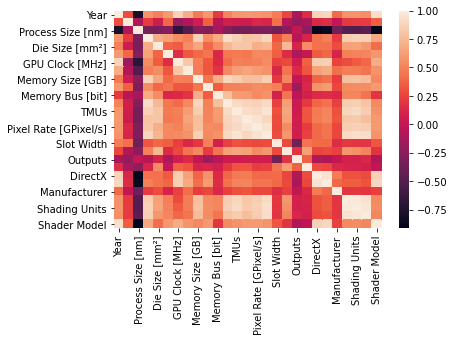

In [14]:
sns.heatmap(df.corr())

In [15]:
df.to_csv("processing/numeric.csv", index=False)

### Filling Null Values:

For categorical columns, we will use the most common value (mode) as a filler, for int values, we can use the median, and for the rest, we can use the average value (mean).

In [25]:
df = pd.read_csv("processing/numeric.csv")

In [26]:
mode = ("Foundry", "Production", "Memory Type", "Slot Width", "Manufacturer")
median = ("Process Size [nm]", "Year", "Die Size [mm²]", "Memory Bus [bit]", "TMUs", "ROPs", "TDP [W]", "Outputs", "Power Connectors", "DirectX", "OpenGL", "Cores", "Shading Units", "Shader Model")
mean = ("Transistors [million]", "GPU Clock [MHz]", "Memory Clock [MHz]", "Memory Size [GB]", "Bandwidth [GB/s]", "Pixel Rate [GPixel/s]", "Texture Rate [GTexel/s]", "FP32 (float) performance [TFLOPS]")

for col in mode:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in median:
    df[col].fillna(df[col].median(), inplace=True)
for col in mean:
    df[col].fillna(df[col].mean(), inplace=True)

In [30]:
df.to_csv("processing/ready.csv", index=False)